### 심장마비 발생 위험도 데이터분석

### 📌 기획
- 각종질환을 가진 환자들을 대상으로 한 데이터세트와, 일반인을 대상으로 한 데이터 세트 총 두개로 데이터 분석을 한다.
- 1. 각종 질환 및 질병에 따른 심장마비 위험도를 분석한다. (두개의 데이터세트를 사용)
  2. 대상자들의 심박수 및 혈중 수치 등을 조사하여 이에 관련된 심장마비 가능성을 분석한다.

#### 심장마비 분석 컬럼별 설명
- (1:참 0:거짓)
- Patient ID (Id) : 환자 ID
- Age : 나이
- Sex (Gender) : 성별
- Cholesterol : 콜레스테롤 수치 
- Blood Pressure (BP) : 혈압수치 
- Heart Rate (HR) : 심장박동 수 
- Diabetes : 당뇨병 유무
- Family History (FH): 유전 유무 (당뇨병)
- Smoking : 흡연 유무 
- Obesity : 비만 유무
- Alcohol Consumption (AC): 알콜 중독 여부 
- Exercise Hours Per Week (EW) : 일주일 평균 운동 시간
- Diet : 건강상태
- Previous Heart Problems (PP) : 심장질환 이력 
- Medication Use (MU) : 약물 사용 유무
- Stress Level (SL) : 스트레스 레벨 
- Sedentary Hours Per Day (Sit): 하루에 앉아있는 시간
- Income : 수입
- BMI : BMI 수치
- Triglycerides : 중성지방
- Physical Activity Days Per Week (Exercise): 1주일 운동 횟수
- Sleep Hours Per Day (Sleep): 수면 시간
- Country : 국가
- Continent : 대륙
- Hemisphere : 반구 (ex> 북반구, 남반구, 적도 ..)
- Heart Attack Risk (Risk): 심장마비 위험 유무

> 우선 주어진 컬럼들로 심장마비 위험도를 분석해보자

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
heart_df = pd.read_csv('./datasets/heart_attack_prediction_dataset.csv')
heart_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [3]:
heart_df.columns = ['Id','Age','Gender','Cholesterol','BP' ,'HR', 'Diabetes', 'FH', 'Smoking', 'Obesity',\
                   'AC','EW','Diet','PP','MU','SL', 'Sit', 'Income', 'BMI', 'Triglycerides', 'Exercise',\
                   'Sleep', 'Country', 'Continent', 'Hemisphere', 'Risk']
heart_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [4]:
heart_df.isna().sum() # 결측치 없음 

Id               0
Age              0
Gender           0
Cholesterol      0
BP               0
HR               0
Diabetes         0
FH               0
Smoking          0
Obesity          0
AC               0
EW               0
Diet             0
PP               0
MU               0
SL               0
Sit              0
Income           0
BMI              0
Triglycerides    0
Exercise         0
Sleep            0
Country          0
Continent        0
Hemisphere       0
Risk             0
dtype: int64

In [5]:
heart_df.duplicated().sum() # 중복된 행도 없음 

0

### 💡가설 
> #### 환자들의 연령대와 심장마비 발생 가능성과 연관이 있을 것이다.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


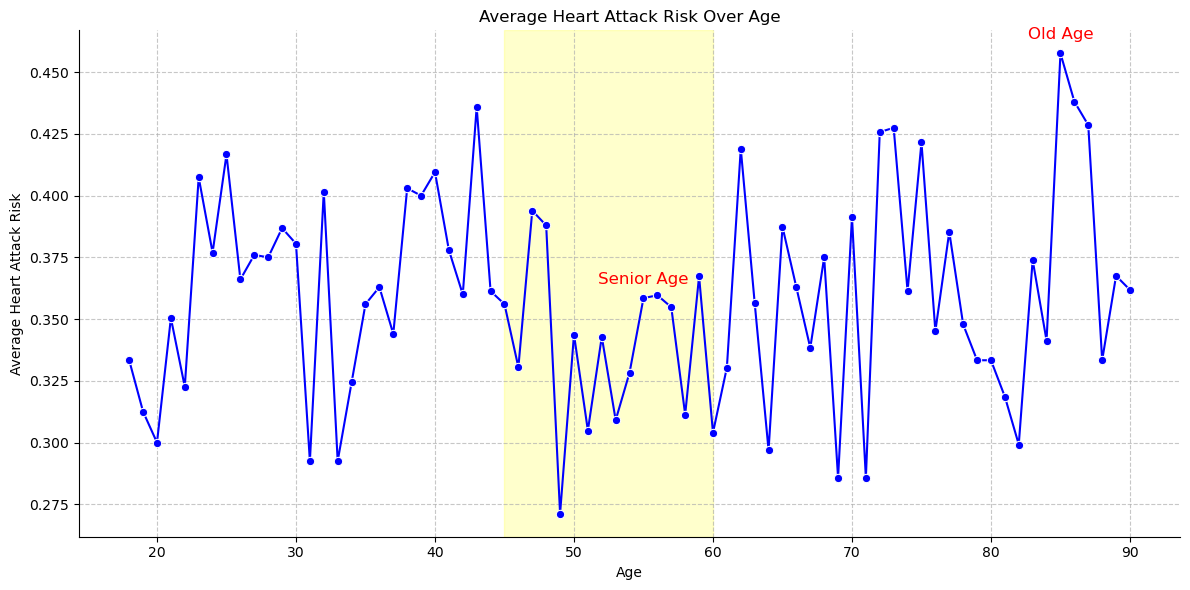

In [6]:
#  데이터를 '나이'로 그룹화하고 각 나이 그룹에 대한 평균 심장마비 발병 위험도를 계산
average_heart_attack_risk = heart_df.groupby('Age')['Risk'].mean()

# 그림과 축을 만듭니다
plt.figure(figsize=(12, 6))
ax = plt.gca()

# 데이터를 그립니다
sns.lineplot(x=average_heart_attack_risk.index, y=average_heart_attack_risk.values, marker='o', color='b', ax=ax)

plt.xlabel('Age')
plt.ylabel('Average Heart Attack Risk')
plt.title('Average Heart Attack Risk Over Age')
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

interesting_points = [(85, "Old Age"), (55, "Senior Age")]
for x, label in interesting_points:
    y_value = average_heart_attack_risk[x]
    ax.annotate(f'{label}', (x, y_value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='r')

highlight_age_range = (45, 60)
plt.axvspan(*highlight_age_range, alpha=0.2, color='yellow')


plt.xticks(range(20, 100, 10))


plt.tight_layout()
plt.show()

#### 1차 분석 결과 
- 위 시각화 차트를 보면 중장년층 연령대 환자들의 심장마비 위험도 수치가 낮은 것을 볼 수 있지만, 80-90와 같은 높은 연령대에서 수치가 높은 것을 제외하면 생각보다 연령대와 심장마비 위험도 수치는 크게 연관이 없는 것으로 판단하였다.
> #### 연령대와 심장마비 발생 가능성과 연관이 있을 것이다. (X)

In [7]:
# Risk 컬럼의 값이 0이면 "No Risk", 1이면 "Risk"로 값을 변경
heart_df['Risk'] = heart_df['Risk'].map({0: 'No Risk', 1: 'Risk'})


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8763 non-null   object 
 1   Age            8763 non-null   int64  
 2   Gender         8763 non-null   object 
 3   Cholesterol    8763 non-null   int64  
 4   BP             8763 non-null   object 
 5   HR             8763 non-null   int64  
 6   Diabetes       8763 non-null   int64  
 7   FH             8763 non-null   int64  
 8   Smoking        8763 non-null   int64  
 9   Obesity        8763 non-null   int64  
 10  AC             8763 non-null   int64  
 11  EW             8763 non-null   float64
 12  Diet           8763 non-null   object 
 13  PP             8763 non-null   int64  
 14  MU             8763 non-null   int64  
 15  SL             8763 non-null   int64  
 16  Sit            8763 non-null   float64
 17  Income         8763 non-null   int64  
 18  BMI     

In [9]:
heart_df['Continent'].value_counts() # 아시아의 환자 수가 제일 많다.

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

In [10]:
asia_df = heart_df[heart_df['Continent'] == 'Asia'] # 2543 , 64.61%
asia_df['Risk'].value_counts()

Risk
No Risk    1643
Risk        900
Name: count, dtype: int64

In [11]:
eu_df = heart_df[heart_df['Continent'] == 'Europe'] # 2241 , 65.42% 
eu_df['Risk'].value_counts()
eu_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,Risk
15,DCY3282,73,Male,122,114/88,97,1,1,1,0,...,10.086479,265839,36.524395,773,5,8,Italy,Europe,Southern Hemisphere,Risk
21,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere,Risk
22,LBY7992,50,Male,359,175/60,97,0,1,1,0,...,4.045831,278301,34.651090,358,4,8,Spain,Europe,Southern Hemisphere,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,XGB9531,88,Male,146,157/97,78,0,0,1,0,...,6.291011,255313,23.418849,446,6,10,Spain,Europe,Southern Hemisphere,No Risk
8748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,6.766948,50533,35.074391,191,3,10,Spain,Europe,Southern Hemisphere,No Risk
8751,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,6.634988,228009,23.793280,748,5,8,Spain,Europe,Southern Hemisphere,Risk
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,No Risk


In [12]:
continent_df = heart_df.groupby(['Continent', 'Risk']).size().reset_index()
continent_df

,Continent,Risk,0
0,Africa,No Risk,551
1,Africa,Risk,322
2,Asia,No Risk,1643
3,Asia,Risk,900
4,Australia,No Risk,565
5,Australia,Risk,319
6,Europe,No Risk,1466
7,Europe,Risk,775
8,North America,No Risk,536
9,North America,Risk,324


In [13]:
heart_df.drop('Id',axis=1) # Id 컬럼 제거 

,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,AC,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,No Risk
8759,28,Female,120,157/102,73,1,0,0,1,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,No Risk
8760,47,Male,250,161/75,105,0,1,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,Risk
8761,36,Male,178,119/67,60,1,0,1,0,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,No Risk


- 비만도 & 운동 & 수면 & 약물 사용 & BMI 수치 & 나라, 심장마비 위험도

In [14]:
heart_risk_df = heart_df[heart_df['Risk'] == 'Risk']
heart_risk_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,Risk
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,Risk
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,Risk
12,FPS0415,77,Male,228,101/72,68,1,1,1,1,...,10.917524,29886,35.102236,590,7,6,Vietnam,Asia,Northern Hemisphere,Risk
13,YYU9565,60,Male,259,169/72,85,1,1,1,0,...,8.727417,292173,25.564897,506,1,4,China,Asia,Northern Hemisphere,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,Risk
8754,LZM3606,80,Female,383,153/96,91,1,1,1,0,...,8.234883,101341,20.490450,174,3,4,Argentina,South America,Southern Hemisphere,Risk
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,Risk
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,Risk


In [15]:
heart_risk_df['Smoking'].value_counts()
# 심장마비 위험한 환자 흡연률 89.52 %

Smoking
1    2810
0     329
Name: count, dtype: int64

In [16]:
heart_risk_df['Diabetes'].value_counts()
# 심장마비 위험한 환자 당뇨병 비율 66.33 %

Diabetes
1    2082
0    1057
Name: count, dtype: int64

In [17]:
heart_not_risk_df = heart_df[heart_df['Risk'] == 'No Risk']
heart_not_risk_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,No Risk
8757,YDX2478,59,Female,378,93/78,99,0,1,1,1,...,7.495231,70415,39.976061,158,1,9,China,Asia,Northern Hemisphere,No Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,No Risk
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,No Risk


In [18]:
heart_not_risk_df['Diabetes'].value_counts()
# 심장마비 안전한 환자 당뇨병 비율 64.62 % 

# 당뇨병과 심장마비가 연관성이 있는 것을 확인 

Diabetes
1    3634
0    1990
Name: count, dtype: int64

In [19]:
heart_not_risk_df['Smoking'].value_counts()
# 심장마비 안전한 환자 흡연률 89.78 % 

Smoking
1    5049
0     575
Name: count, dtype: int64

In [20]:
heart_not_risk_df['Diabetes'].value_counts()
# 심장마비 안전한 환자 당뇨병 비율 64.62 % 

Diabetes
1    3634
0    1990
Name: count, dtype: int64

In [21]:
heart_df['Smoking'].value_counts()
# 전체 환자 흡연률 = 89.68 % 

Smoking
1    7859
0     904
Name: count, dtype: int64

In [22]:
heart_df['Diabetes'].value_counts()
# 전체 환자 중 당뇨병 비율 65.23 %

Diabetes
1    5716
0    3047
Name: count, dtype: int64

In [23]:
# 신체적 활동 및 신체 상태 에 따른 심장마비 위험도 데이터 프레임 
selected_columns1 = ['Id', 'Age', 'Gender','Obesity','EW','Exercise','Diet','MU','Sit','Sleep','BMI','Country', 'Risk']
health_lifestyle_df = heart_df[selected_columns1].copy()
health_lifestyle_df

,Id,Age,Gender,Obesity,EW,Exercise,Diet,MU,Sit,Sleep,BMI,Country,Risk
0,BMW7812,67,Male,0,4.168189,0,Average,0,6.615001,6,31.251233,Argentina,No Risk
1,CZE1114,21,Male,1,1.813242,1,Unhealthy,0,4.963459,7,27.194973,Canada,No Risk
2,BNI9906,21,Female,0,2.078353,4,Healthy,1,9.463426,4,28.176571,France,No Risk
3,JLN3497,84,Male,0,9.828130,3,Average,0,7.648981,4,36.464704,Canada,No Risk
4,GFO8847,66,Male,1,5.804299,1,Unhealthy,0,1.514821,5,21.809144,Thailand,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,0,7.917342,7,Healthy,1,10.806373,7,19.655895,Thailand,No Risk
8759,QSV6764,28,Female,1,16.558426,4,Healthy,0,3.833038,9,23.993866,Canada,No Risk
8760,XKA5925,47,Male,1,3.148438,4,Average,0,2.375214,4,35.406146,Brazil,Risk
8761,EPE6801,36,Male,0,3.789950,2,Unhealthy,1,0.029104,8,27.294020,Brazil,No Risk


- 흡연 & 알코올 중독 & 당뇨병 & 가족 중 당뇨병 유무 & 심장질환 이력 & 스트레스 레벨 & 콜레스테롤 수치 & 중성지방

In [24]:
# 만성 질병 및 흡연,음주에 따른 심장마비 위험도 데이터 프레임
selected_columns2 = ['Id','Age','Gender','Diabetes', 'FH', 'Smoking', 'AC', 'PP', 'SL', 'Cholesterol'\
                     ,'Triglycerides','Country', 'Risk']
chronic_disease_df = heart_df[selected_columns2].copy()
chronic_disease_df

,Id,Age,Gender,Diabetes,FH,Smoking,AC,PP,SL,Cholesterol,Triglycerides,Country,Risk
0,BMW7812,67,Male,0,0,1,0,0,9,208,286,Argentina,No Risk
1,CZE1114,21,Male,1,1,1,1,1,1,389,235,Canada,No Risk
2,BNI9906,21,Female,1,0,0,0,1,9,324,587,France,No Risk
3,JLN3497,84,Male,1,1,1,1,1,9,383,378,Canada,No Risk
4,GFO8847,66,Male,1,1,1,0,1,6,318,231,Thailand,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,1,1,1,1,1,8,121,67,Thailand,No Risk
8759,QSV6764,28,Female,1,0,0,0,0,8,120,617,Canada,No Risk
8760,XKA5925,47,Male,0,1,1,1,1,5,250,527,Brazil,Risk
8761,EPE6801,36,Male,1,0,1,0,1,5,178,114,Brazil,No Risk


In [25]:
# 소득 수준에 따른 심장마비 위험도 데이터 프레임 
selected_columns3 = ['Id','Age','Gender','Income','Hemisphere', 'Continent','Country','Risk']
income_df = heart_df[selected_columns3].copy()
income_df

,Id,Age,Gender,Income,Hemisphere,Continent,Country,Risk
0,BMW7812,67,Male,261404,Southern Hemisphere,South America,Argentina,No Risk
1,CZE1114,21,Male,285768,Northern Hemisphere,North America,Canada,No Risk
2,BNI9906,21,Female,235282,Northern Hemisphere,Europe,France,No Risk
3,JLN3497,84,Male,125640,Northern Hemisphere,North America,Canada,No Risk
4,GFO8847,66,Male,160555,Northern Hemisphere,Asia,Thailand,No Risk
...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,235420,Northern Hemisphere,Asia,Thailand,No Risk
8759,QSV6764,28,Female,217881,Northern Hemisphere,North America,Canada,No Risk
8760,XKA5925,47,Male,36998,Southern Hemisphere,South America,Brazil,Risk
8761,EPE6801,36,Male,209943,Southern Hemisphere,South America,Brazil,No Risk


In [26]:
income_df.sort_values(by='Income', ascending=False)

# 분석 결과 소득이 가장 높은 환자들의 심장마비 위험 가능성이 있다는 사실이 발견되었다.
# 결국 환자들의 소득과 심장마비 위험도와는 큰 연관이 없다.

,Id,Age,Gender,Income,Hemisphere,Continent,Country,Risk
1309,WQX6573,52,Male,299954,Northern Hemisphere,Europe,United Kingdom,Risk
2932,DBG3809,62,Female,299909,Northern Hemisphere,Europe,United Kingdom,Risk
8010,TZP7090,38,Female,299891,Southern Hemisphere,South America,Brazil,No Risk
2783,JOG1127,90,Male,299850,Northern Hemisphere,Europe,France,Risk
8285,GAP1994,78,Male,299810,Northern Hemisphere,Africa,Nigeria,No Risk
...,...,...,...,...,...,...,...,...
1989,YOA3551,27,Female,20208,Northern Hemisphere,Europe,France,No Risk
5866,NMF3872,52,Male,20165,Northern Hemisphere,Asia,South Korea,No Risk
1339,XEI6177,46,Male,20162,Southern Hemisphere,Europe,Spain,No Risk
1404,OXV6631,22,Female,20140,Northern Hemisphere,Asia,Japan,No Risk


In [27]:
income_df.groupby('Risk')['Income'].mean().reset_index()

,Risk,Income
0,No Risk,157683.662873
1,Risk,159301.479133


In [28]:
chronic_disease_risk_df = chronic_disease_df[chronic_disease_df['Risk'] == 'Risk']
chronic_disease_risk_df

chronic_disease_risk_df['Diabetes'].value_counts()

Diabetes
1    2082
0    1057
Name: count, dtype: int64

In [29]:
chronic_disease_not_risk_df = chronic_disease_df[chronic_disease_df['Risk'] == 'No Risk']
chronic_disease_not_risk_df 

chronic_disease_not_risk_df['Diabetes'].value_counts()
# 당뇨병 수치 64.5 % 

Diabetes
1    3634
0    1990
Name: count, dtype: int64

In [30]:
# chronic_disease_df.describe().T

In [31]:
chronic_disease_risk_df['Triglycerides'].describe().T

count    3139.000000
mean      420.812998
std       226.782120
min        30.000000
25%       220.000000
50%       423.000000
75%       618.000000
max       800.000000
Name: Triglycerides, dtype: float64

In [32]:
chronic_disease_not_risk_df['Triglycerides'].describe().T

count    5624.000000
mean      415.926743
std       222.037741
min        30.000000
25%       228.000000
50%       414.000000
75%       608.250000
max       800.000000
Name: Triglycerides, dtype: float64

In [33]:
chronic_disease_risk_df[chronic_disease_risk_df['Triglycerides'] >= 800]

,Id,Age,Gender,Diabetes,FH,Smoking,AC,PP,SL,Cholesterol,Triglycerides,Country,Risk
509,GAD4553,33,Female,0,0,0,1,1,7,240,800,South Africa,Risk
770,ZFK2082,63,Female,1,1,1,1,0,5,243,800,United States,Risk
6617,RFQ8525,50,Male,0,1,1,0,0,3,346,800,United States,Risk


In [34]:
chronic_disease_not_risk_df[chronic_disease_not_risk_df['Triglycerides'] >= 800]

,Id,Age,Gender,Diabetes,FH,Smoking,AC,PP,SL,Cholesterol,Triglycerides,Country,Risk
875,LDY6154,29,Male,1,0,1,1,0,4,264,800,United States,No Risk
1939,OTI1194,33,Male,1,1,1,0,1,4,130,800,South Korea,No Risk
3546,MTI8757,46,Male,0,0,1,1,0,1,155,800,Nigeria,No Risk
4513,RCG8438,85,Male,1,1,1,0,0,7,285,800,United Kingdom,No Risk
5844,DCD4966,21,Male,0,0,1,1,1,5,334,800,Spain,No Risk


In [35]:
chronic_disease_df[chronic_disease_df['Triglycerides'] >= 800]

,Id,Age,Gender,Diabetes,FH,Smoking,AC,PP,SL,Cholesterol,Triglycerides,Country,Risk
509,GAD4553,33,Female,0,0,0,1,1,7,240,800,South Africa,Risk
770,ZFK2082,63,Female,1,1,1,1,0,5,243,800,United States,Risk
875,LDY6154,29,Male,1,0,1,1,0,4,264,800,United States,No Risk
1939,OTI1194,33,Male,1,1,1,0,1,4,130,800,South Korea,No Risk
3546,MTI8757,46,Male,0,0,1,1,0,1,155,800,Nigeria,No Risk
4513,RCG8438,85,Male,1,1,1,0,0,7,285,800,United Kingdom,No Risk
5844,DCD4966,21,Male,0,0,1,1,1,5,334,800,Spain,No Risk
6617,RFQ8525,50,Male,0,1,1,0,0,3,346,800,United States,Risk


#### 데이터 분석 결과 
- 심장마비 위험성이 발견된 환자들과 아닌 환자들과 중성지방 수치를 비교해보았을 때 큰 차이가 없는 것으로 보아
  중성지방과 심장마비와는 연관이 없다는 것을 알게 되었다. 

In [36]:
male_df = heart_df[heart_df['Gender'] == 'Male']
male_df['Id'].value_counts()
# 전체 데이터 내 남성 6111명

female_df = heart_df[heart_df['Gender'] == 'Female']
female_df['Id'].value_counts()
# 전체 데이터 내 여성 2652명

Id
BNI9906    1
VHT2026    1
OHG8532    1
ZUR7294    1
ZLS6426    1
          ..
YLL5287    1
KHI2470    1
NNY7030    1
SJZ2989    1
ZWN9666    1
Name: count, Length: 2652, dtype: int64

In [37]:
male_risk_df = heart_risk_df[heart_risk_df['Gender'] == 'Male']
male_risk_df
male_risk_df['Risk'].value_counts()
# 남성 환자 전체 6111명 중 2195명이 심장마비 위험

Risk
Risk    2195
Name: count, dtype: int64

In [38]:
female_risk_df = heart_risk_df[heart_risk_df['Gender'] == 'Female']
female_risk_df['Risk'].value_counts()
# 여성 환자 전체 2652명 중 944명이 심장마비 위험 

Risk
Risk    944
Name: count, dtype: int64

In [39]:
heart_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,No Risk
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,No Risk
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,Risk
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,No Risk


In [40]:
# 수면시간을 범위로 나눠서 수면부족, 정상, 수면과 로 레벨을 만들자 
l1, l2= np.percentile(heart_df['Sleep'], [25,70])
print(l1, l2)

5.0 8.0


#### 적정 수면시간
- 💡 일반적으로 일상 생활을 잘 유지하기 위하여 하루 6~8시간 정도의 수면을 취하는 것이 좋습니다. 

In [41]:
def get_level(x):
    if x <= l1:
        return 3
    if x <= l2:
        return 2
    return 1

In [42]:
health_lifestyle_df['SleepLevel'] = health_lifestyle_df['Sleep'].apply(get_level)
heart_df

,Id,Age,Gender,Cholesterol,BP,HR,Diabetes,FH,Smoking,Obesity,...,Sit,Income,BMI,Triglycerides,Exercise,Sleep,Country,Continent,Hemisphere,Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,No Risk
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,No Risk
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,Risk
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,No Risk


In [43]:
health_lifestyle_df['SleepLevel'] = health_lifestyle_df['SleepLevel'].replace([3, 2, 1], ['Lack', 'Average', 'Plethora'])
health_lifestyle_df

,Id,Age,Gender,Obesity,EW,Exercise,Diet,MU,Sit,Sleep,BMI,Country,Risk,SleepLevel
0,BMW7812,67,Male,0,4.168189,0,Average,0,6.615001,6,31.251233,Argentina,No Risk,Average
1,CZE1114,21,Male,1,1.813242,1,Unhealthy,0,4.963459,7,27.194973,Canada,No Risk,Average
2,BNI9906,21,Female,0,2.078353,4,Healthy,1,9.463426,4,28.176571,France,No Risk,Lack
3,JLN3497,84,Male,0,9.828130,3,Average,0,7.648981,4,36.464704,Canada,No Risk,Lack
4,GFO8847,66,Male,1,5.804299,1,Unhealthy,0,1.514821,5,21.809144,Thailand,No Risk,Lack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,0,7.917342,7,Healthy,1,10.806373,7,19.655895,Thailand,No Risk,Average
8759,QSV6764,28,Female,1,16.558426,4,Healthy,0,3.833038,9,23.993866,Canada,No Risk,Plethora
8760,XKA5925,47,Male,1,3.148438,4,Average,0,2.375214,4,35.406146,Brazil,Risk,Lack
8761,EPE6801,36,Male,0,3.789950,2,Unhealthy,1,0.029104,8,27.294020,Brazil,No Risk,Average


In [44]:
# 생활습관에 따른 심장마비 위험한 환자들만 추출 
health_lifestyle_risk_df = health_lifestyle_df[health_lifestyle_df['Risk'] == 'Risk']
health_lifestyle_risk_df

,Id,Age,Gender,Obesity,EW,Exercise,Diet,MU,Sit,Sleep,BMI,Country,Risk,SleepLevel
5,ZOO7941,54,Female,0,0.625008,5,Unhealthy,1,7.798752,10,20.146840,Germany,Risk,Plethora
6,WYV0966,90,Male,0,4.098177,4,Healthy,0,0.627356,10,28.885811,Canada,Risk,Plethora
7,XXM0972,84,Male,1,3.427929,6,Average,1,10.543780,7,22.221862,Japan,Risk,Average
12,FPS0415,77,Male,1,19.633268,7,Unhealthy,0,10.917524,6,35.102236,Vietnam,Risk,Average
13,YYU9565,60,Male,0,17.037374,1,Healthy,1,8.727417,4,25.564897,China,Risk,Lack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,NVC8704,82,Male,1,8.202449,1,Unhealthy,0,8.402977,5,27.694240,Australia,Risk,Lack
8754,LZM3606,80,Female,0,6.082656,3,Healthy,1,8.234883,4,20.490450,Argentina,Risk,Lack
8756,BUE0416,22,Male,0,3.820772,2,Healthy,1,6.786750,9,20.295054,Canada,Risk,Plethora
8760,XKA5925,47,Male,1,3.148438,4,Average,0,2.375214,4,35.406146,Brazil,Risk,Lack


In [45]:
# heart_not_risk_df['Risk'].value_counts()
heart_not_risk_df['Sleep'].describe().T

count    5624.000000
mean        7.051031
std         1.998148
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Sleep, dtype: float64

In [46]:
# health_lifestyle_risk_df['Risk'].value_counts()
health_lifestyle_risk_df['Sleep'].describe().T

count    3139.000000
mean        6.974196
std         1.970376
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Sleep, dtype: float64

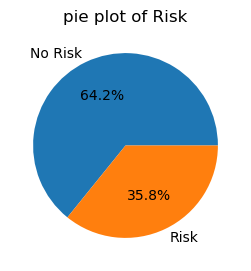

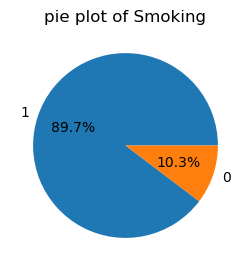

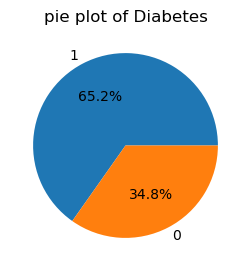

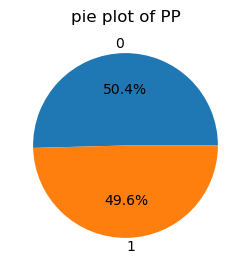

In [47]:

import matplotlib.pyplot as plt
columns=["Risk","Smoking","Diabetes","PP"]

for column in columns:
    plt.figure(figsize=(4,3))
    #counts the value of data
    counts=heart_df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f"pie plot of {column}")
    plt.show()

> 전체 환자 중 심장마비 위험 수치가 없는 환자가 64.2 % 로 위험성이 있는 환자보다 더 많았다.
> 전체 환자중 89.7 %는 흡연자 였다.
> 당뇨병 환자 또한 65.2%로 아닌 환자 보다 더 많았다.
> 이전 심장질환을 갖고 있던 환자들이 50.4%로 근소하게 높았다.

In [48]:
heart_risk_df['Country'].value_counts() # 나이지리아의 환자들이 심장마비 위험도 환자들의 수가 가장 많았다.

Country
Nigeria           178
Argentina         174
Germany           172
Australia         168
United States     166
Brazil            163
South Korea       163
Colombia          162
Thailand          161
United Kingdom    160
Canada            158
France            157
China             155
New Zealand       151
Spain             150
Vietnam           148
South Africa      144
Japan             144
Italy             136
India             129
Name: count, dtype: int64

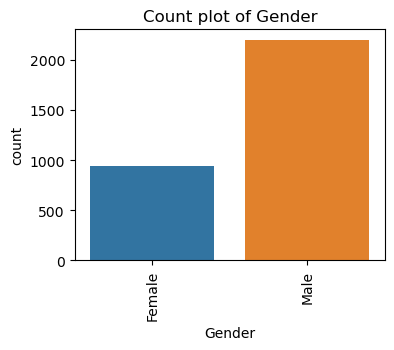

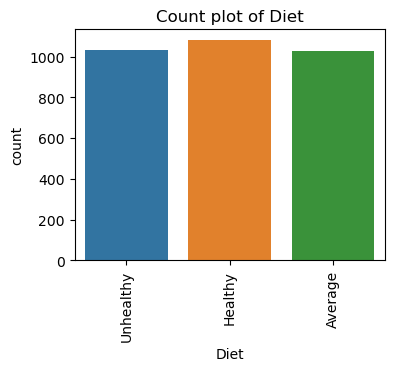

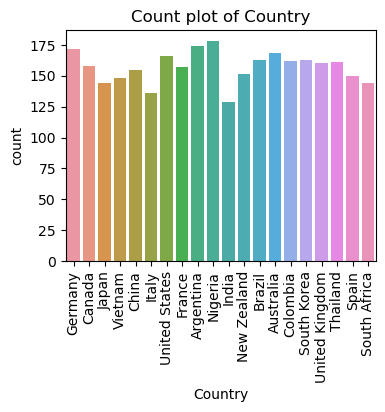

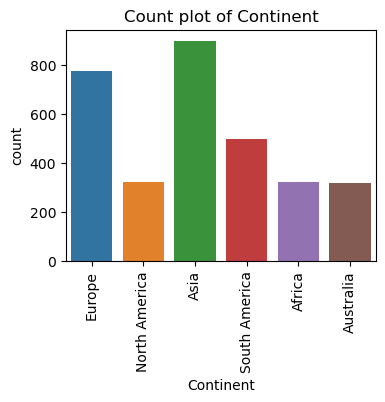

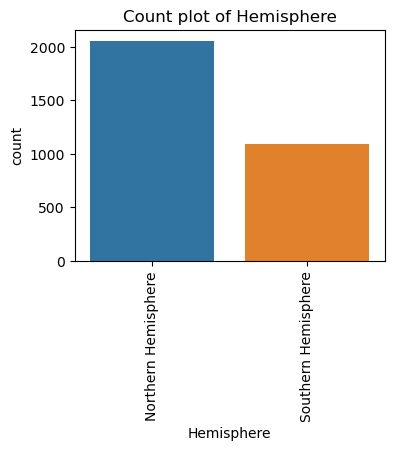

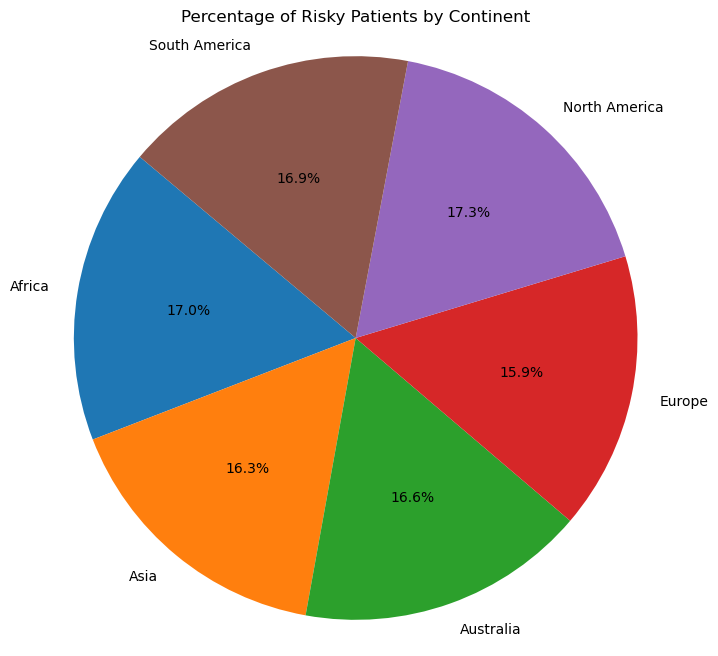

In [49]:
# Fisrt chose the columns from dataset to make a count plot
import matplotlib.pyplot as plt
import seaborn as sns
columns=["Gender","Diet","Country","Continent","Hemisphere"]
# using for loop 
for column in columns:
    plt.figure(figsize=(4,3))
    sns.countplot(x=column, data=heart_risk_df)# X axix is represnt columns and y axis is represent data
    # title of plot
    plt.title(f"Count plot of {column}")
    plt.xticks(rotation=90)
    plt.show()

# 대륙별로 위험한 환자와 안전한 환자의 비율 계산
continent_risk_percentage = heart_df.groupby(['Continent', 'Risk']).size().unstack(fill_value=0)
continent_risk_percentage['Total'] = continent_risk_percentage['Risk'] + continent_risk_percentage['No Risk']
continent_risk_percentage['Risk Percentage'] = (continent_risk_percentage['Risk'] / continent_risk_percentage['Total']) * 100


# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(continent_risk_percentage['Risk Percentage'], labels=continent_risk_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Risky Patients by Continent')
plt.axis('equal')  # 원이 원형으로 보이도록 조정
plt.show()



#### 분석 결과 (건강,지역별, 성별 )
- 성별을 나눠서 분석한 결과 남성이 여성보다 심장마비 위험도를 가진 환자들이 더많았다.
- 건강상태가 건강한 환자들이 가장 많았고, 평균인 환자들과 건강상태가 좋지 않은 환자들의 분포수는 동일했다.
- 심장마비 위험도가 가장 많은 나라는 나이지리아, 그 다음으로 아르헨티나였다.
- 대륙별로 분석하였을때 아시아가 가장 많았으며, 그 다음으로 유럽이 많았다.
- 북반구가 남반구에 비해 심장마비 위험도가 있는 환자들이 더 많았다.
- 그러나 대륙별 심장마비 위험도 수치를 퍼센트로 환산한 결과 전체 환자별 심장마비 발생 위험은 오히려 아시아와 유럽이 낮게 나왔고 북아메리카와 아프리카, 그리고 남아메리카가 가장 높은 것을 볼 수 있다. 

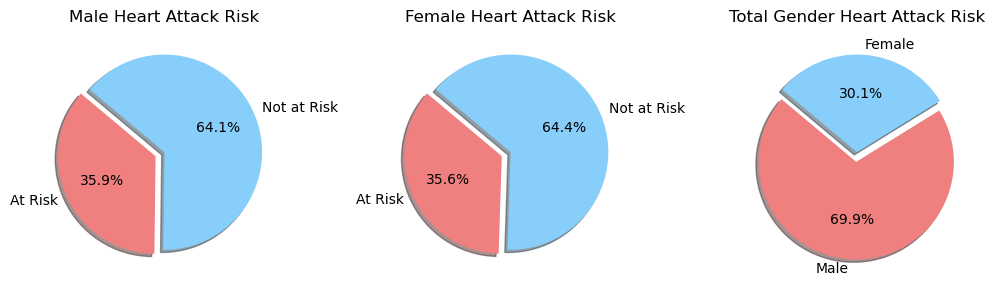

In [50]:
# 심장마비 환자 중 성별 데이터 
gender_df1 = (heart_risk_df['Gender'].value_counts(normalize=True)*100).round(2)
gender_size = gender_df1.values
gender_value = gender_df1.index

# 남성과 여성의 심장마비 위험 비율 데이터
labels = 'At Risk', 'Not at Risk'
male_sizes = [2195, 6111-2195] # 3916
female_sizes = [944, 2652-944] # 1708
# 위 sizes 들을 퍼센트로 환산한다.
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

# Subplot 설정
fig, axs = plt.subplots(1, 3)
axs[0].pie(male_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Male Heart Attack Risk')

axs[1].pie(female_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Female Heart Attack Risk')

axs[2].pie(gender_size, explode=explode , labels=gender_value, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[2].set_title('Total Gender Heart Attack Risk')
# 도표 크기 조정
fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()


In [51]:
heart_risk_df['Gender'].value_counts()

Gender
Male      2195
Female     944
Name: count, dtype: int64

#### 성별에 따른 심장마비 위험도 분석
- 전체 데이터 내 남녀 인원 수 = 남자 : 6111명 , 여자 : 2652명
- 성별에 따른 심장마비 위험 수치로 남성이 2195명, 여성이 944명으로 전체 데이터에서 위험도를 환산하면
- 남성이 35.9 %, 여성이 35.6%로 남성의 심장마비 위험 수치가 근소하게 높은 것을 확인 할 수 있다.
- 그러나 해당 datasets의 경우 각종 질환 및 나쁜 생활 습관을 가진 환자들의 수가 굉장히 많기 때문에, 성별로만 심장마비 위험도를 분석하기에는 무리가 있다.

<img src='./images/gender3.png' width=900>
  <a href="https://www.pointe.co.kr/news/articleView.html?idxno=5694#:~:text=%EA%B5%AD%EB%82%B4%20%EA%B8%89%EC%84%B1%EC%8B%AC%EC%9E%A5%EC%A0%95%EC%A7%80%20%ED%99%98%EC%9E%90,%EB%8D%94%20%EB%86%92%EB%8B%A4%EB%8A%94%20%EC%97%B0%EA%B5%AC%EA%B0%80%20%EB%82%98%EC%99%94%EB%8B%A4.">출처자료 : 포인트경제</a>

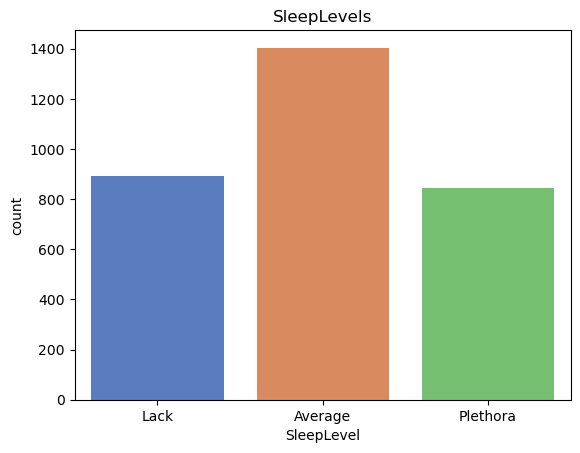

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Lack', 'Average', 'Plethora']
sns.countplot(x='SleepLevel', data=health_lifestyle_risk_df, palette='muted', order=order)
plt.title('SleepLevels')
plt.show()


#### 수면시간과 심장마비 위험도의 연관성 검사 
- 분석 결과 심장마비 위험수치가 있는 사람들중에서 적정 수면 시간을 취하는 사람들이 제일 많았다.
- 이 결과 해당 데이터세트내의 심장마비와 수면시간과는 큰 연관성은 없는것으로 판단하였다.

In [53]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(x='Age', data=heart_df, hue='Risk', multiple='stack') 


<!-- #### 연령대별 심장마비 위험도 분석
- 위에서 보여드렸던 연령별 심장마비 위험도 선그래프와 마찬가지로 모든 연령대에서 골고루 심장마비 위험 가능성이 있는 환자들의 수치가 분포되어있는것으로 보아, 해당 데이터세트에서 연령대와 심장마비 위험도와는 큰 연관성이 없는 것으로 판단하였습니다. -->

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


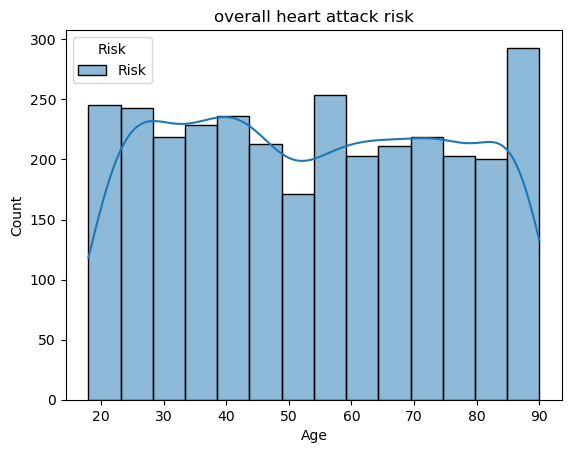

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


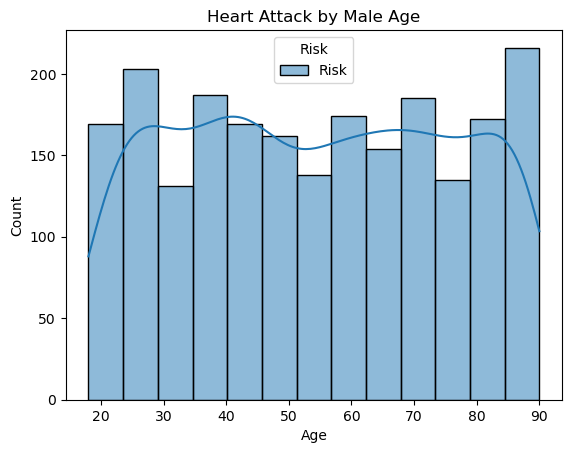

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


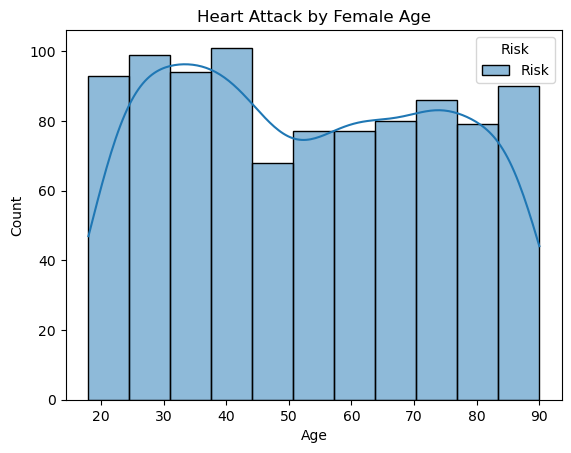

In [54]:
sns.histplot(x='Age', data=heart_risk_df, hue='Risk', kde=True)
plt.title('overall heart attack risk')
plt.show()

sns.histplot(x='Age', data=male_risk_df, hue='Risk', kde=True)
plt.title('Heart Attack by Male Age')
plt.show()

sns.histplot(x='Age', data=female_risk_df, hue='Risk', kde=True)
plt.title('Heart Attack by Female Age')
plt.show()

In [55]:
heart_df.groupby('Age')['Risk'].value_counts()

Age  Risk   
18   No Risk    82
     Risk       41
19   No Risk    88
     Risk       40
20   No Risk    91
                ..
88   Risk       41
89   No Risk    74
     Risk       43
90   No Risk    97
     Risk       55
Name: count, Length: 146, dtype: int64

#### 연령별 심장마비 위험도 분석
- 분석결과 전체 성별의 연령에 따른 심장마비 위험도는 85세부터 90세 이상의 환자들에게 가장 높았으며,
  20-30대 환자들과 50대 환자들에게도 높은 수치를 보였다.
- 남성의 경우 85세-90세 사이의 환자들에게 가장 높은 위험 수치를 보였다.
- 여성의 경우에는 25세부터 40세 까지 청,장년층들에게 높은 수치를 보였음을 알 수 있다.
- 분석결과 심장마비 위험도는 단순히 연령이 높아짐에 따라 증가되는 것이 아니라, 다른 요인에 의해 영향을 받는 것으로 판단됩니다. 

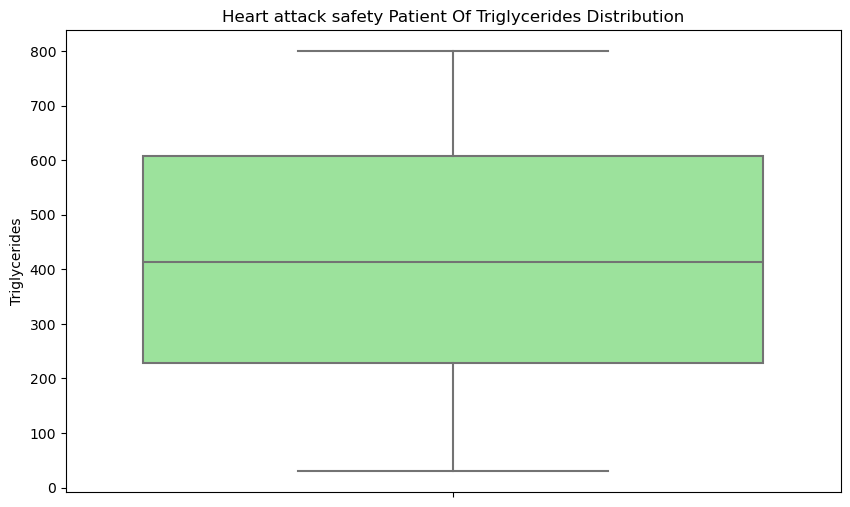

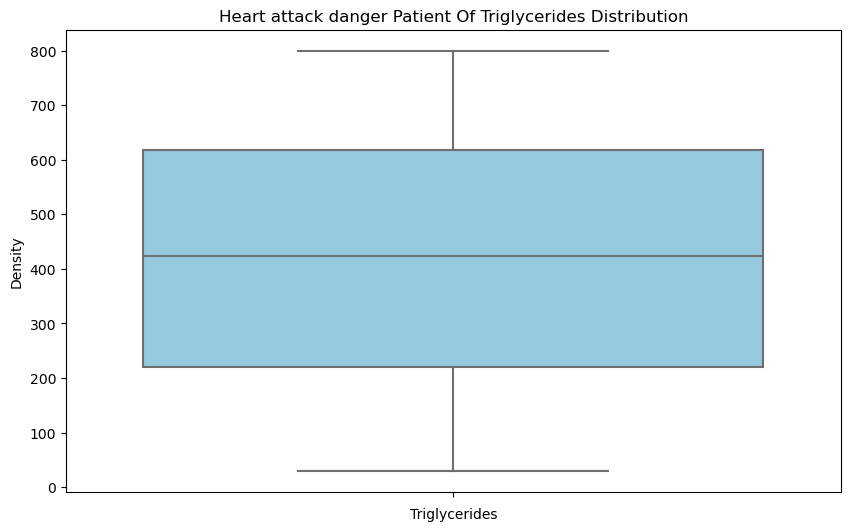

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상자 그림 (만성질병을 가진 환자 전체 대상)
plt.figure(figsize=(10, 6))
sns.boxplot(data=chronic_disease_not_risk_df, y='Triglycerides', color='lightgreen')
plt.title('Heart attack safety Patient Of Triglycerides Distribution')
plt.ylabel('Triglycerides')
plt.show()

# 밀도 그래프 (심장마비 위험도 수치를 보인 환자 대상)
plt.figure(figsize=(10, 6))
sns.boxplot(data=chronic_disease_risk_df, y='Triglycerides',  color='skyblue')
plt.title('Heart attack danger Patient Of Triglycerides Distribution')
plt.xlabel('Triglycerides')
plt.ylabel('Density')
plt.show()


### 중성지방이란 ? 
-  중성지방(Triglyceride, TG)은 지질의 한 종류에요. 일반적으로 혈액 속 지질의 양을 측정할 때 총콜레스테롤, LDL 콜레스테롤, HDL 콜레스테롤과 함께 중성지방(TG)까지 4가지 수치를 확인해요. 중성지방 수치가 높으면 동맥경화 위험도가 커져요.

#### 중성지방 수치에 따른 심장마비 위험도 분석
- 심장마비 위험성이 발견된 환자들과 아닌 환자들과 중성지방 수치를 비교해보았을 때 큰 차이가 없는 것으로 보아
  중성지방과 심장마비와는 연관이 없다는 것을 알게 되었다. 

#### 💡가설
- 콜레스테롤이 높은 환자들이 심장마비의 위험도가 더 높을 것이다. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


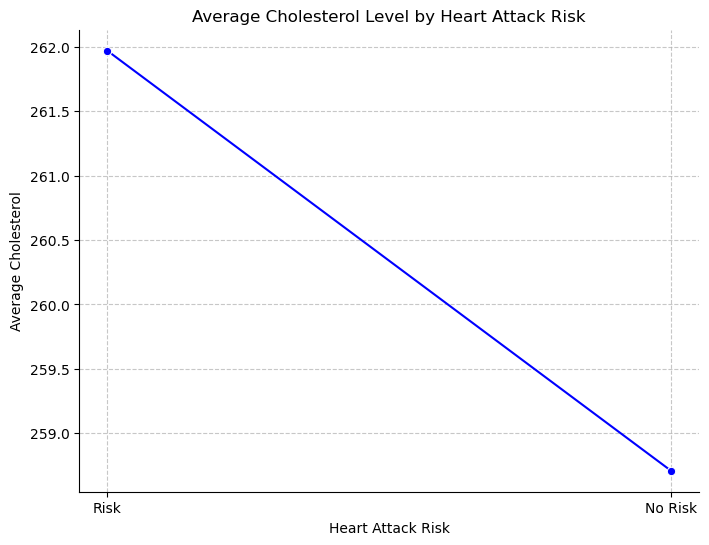

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 심장마비 위험 그룹과 위험 없는 그룹의 평균 콜레스테롤 수준 구하기
risk_mean_chol = chronic_disease_risk_df['Cholesterol'].mean()
no_risk_mean_chol = chronic_disease_not_risk_df['Cholesterol'].mean()

# 시각화를 위한 데이터프레임 생성
data = pd.DataFrame({
    'Risk': ['Risk', 'No Risk'],
    'Cholesterol_mean': [risk_mean_chol, no_risk_mean_chol]
})

# 차트 시각화
plt.figure(figsize=(8, 6))
sns.lineplot(x='Risk', y='Cholesterol_mean', data=data, marker='o', color='b')
plt.title('Average Cholesterol Level by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Average Cholesterol')
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()


#### 콜레스테롤 수치에 따른 심장마비 위험도 분석
- 분석결과 심장마비 발병 위험군의 환자들은 콜레스테롤 수치가 262가 나왔고, 심장마비로 부터 안전한 환자들은 258이 나왔으며 이 결과로 콜레스테롤 수치와 심장마비와 연관성이 있는 것을 알 수 있었다.


### 콜레스테롤 & 심장질환 뉴스 기사 이미지
<div>
    <img src='./images/col.png' style="margin-left:50">
</div>
<a href='https://www.kslm.org/sub01/sub03_4.html'>출처자료:대한검사의학회</a>

<div>
    <img src='./images/col1.png' width="800" style="margin-left:50">
</div>
<a href='https://www.hidoc.co.kr/healthstory/news/C0000587263'>출처자료:하이닥 건강의학 기사</a>

In [58]:
### 심장질환 이력과 당뇨병이 있는 사람들의 심장마비 위험도 분석
heart_df.groupby(['Gender','PP','Diabetes' , 'Risk']).size().reset_index()
# 심장질환 이력이 없는 환자들의 심장마비 위험도 = 35.81%
# 심장질환 이력이 있는 환자들의 심장마비 위험도 = 35.83%

# 심장질환 & 당뇨병 같이 있는 환자들의 심장마비 위험도 = 36.46%
# ! 심장질환 & ! 당뇨병 환자 심장마비 위험도 = 34.72%


,Gender,PP,Diabetes,Risk,0
0,Female,0,0,No Risk,317
1,Female,0,0,Risk,167
2,Female,0,1,No Risk,542
3,Female,0,1,Risk,315
4,Female,1,0,No Risk,301
5,Female,1,0,Risk,144
6,Female,1,1,No Risk,548
7,Female,1,1,Risk,318
8,Male,0,0,No Risk,687
9,Male,0,0,Risk,367


#### 💡가설
- 당뇨병이 있는 환자들이 당뇨병이 없는 환자들보다 심장마비의 위험도가 더 높을 것이다. (O)

#### 당뇨병 수치에 따른 심장마비 위험도 분석 

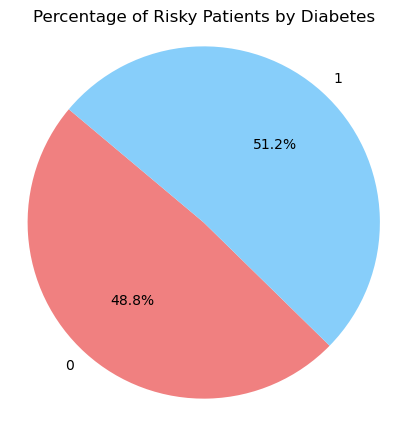

In [59]:
not_df = heart_df[heart_df['Diabetes'] == 0]
not_df
d_df = heart_df[heart_df['Diabetes'] == 1]
d_df['Risk'].value_counts()
not_df['Risk'].value_counts()



# 당뇨병 별로 위험한 환자와 안전한 환자의 비율 계산
diabetes_risk_percentage = heart_df.groupby(['Diabetes', 'Risk']).size().unstack(fill_value=0)
diabetes_risk_percentage['Total'] = diabetes_risk_percentage['Risk'] + diabetes_risk_percentage['No Risk']
diabetes_risk_percentage['Risk Percentage'] = (diabetes_risk_percentage['Risk'] / diabetes_risk_percentage['Total']) * 100


# 파이 차트로 시각화
plt.figure(figsize=(5, 5))
colors = ['lightcoral', 'lightskyblue']
plt.pie(diabetes_risk_percentage['Risk Percentage'], labels=diabetes_risk_percentage.index, autopct='%1.1f%%',startangle=140, colors=colors)
plt.title('Percentage of Risky Patients by Diabetes')
plt.axis('equal')  # 원이 원형으로 보이도록 조정
plt.show()

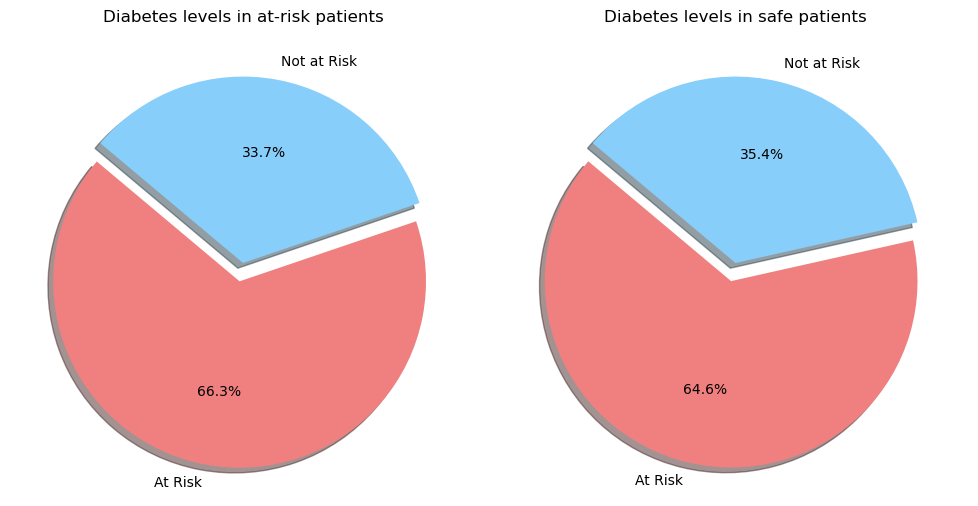

In [60]:
import matplotlib.pyplot as plt

# 위험환자와 안전한 환자의 당뇨병에 연관된 심장마비 위험 비율 데이터
labels = 'At Risk', 'Not at Risk'
risk_sizes = [2082, 3139-2082] # 1057
not_risk_sizes = [3634, 5624-3634] # 1990
# 위 sizes 들을 퍼센트로 환산한다.
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

# Subplot 설정
fig, axs = plt.subplots(1, 2)
axs[0].pie(risk_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Diabetes levels in at-risk patients')

axs[1].pie(not_risk_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Diabetes levels in safe patients')

# 도표 크기 조정
fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()


> 위 시각화그래프와 같이 심장마비 위험도가 높은 환자들의 당뇨병 수치가 66.3 %,
> 안전한 환자들이 64.6%로 당뇨병 수치가 높을 수록 심장마비의 위험이 크다는 것을 알 수 있지만.
> 그러나 대략 2% 차이로 매우 미세한 차이를 보이므로 당뇨병 만으로 심장마비 위험도를 특정할 수는 없다.

In [61]:
# 당뇨병 x 환자 추출 
diabetes_none_df = chronic_disease_df[chronic_disease_df['Diabetes'] == 0]
diabetes_none_df['Risk'].value_counts()
# 35.75 %

Risk
No Risk    1990
Risk       1057
Name: count, dtype: int64

In [62]:
diabetes_df = chronic_disease_df[chronic_disease_df['Diabetes'] == 1]
diabetes_df['Risk'].value_counts()
# 36.42%


Risk
No Risk    3634
Risk       2082
Name: count, dtype: int64

In [63]:
alchol_df = heart_df[heart_df['AC'] == 1]
alchol_risk = (alchol_df['Risk'].value_counts(normalize=True) * 100).round(2)
# 35.28 %

alchol_none_df = heart_df[heart_df['AC'] == 0]
alchol_none_df['Risk'].value_counts()
# 36.63 %
none_a_risk = (alchol_none_df['Risk'].value_counts(normalize=True) * 100).round(2)
print(none_a_risk, alchol_risk)

# 알콜중독과 심장마비와는 크게 연관이 없다.



Risk
No Risk    63.37
Risk       36.63
Name: proportion, dtype: float64 Risk
No Risk    64.72
Risk       35.28
Name: proportion, dtype: float64


Text(0.5, 1.0, 'who have Not been alchol')

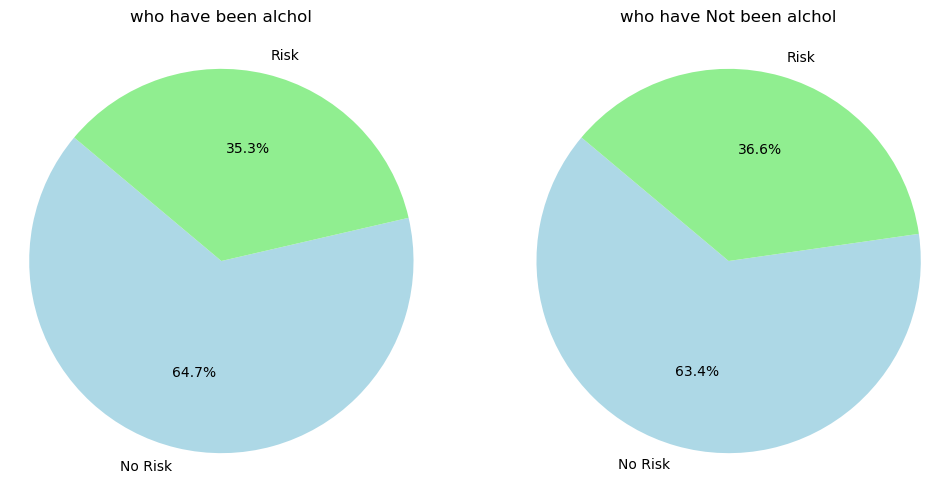

In [64]:
import matplotlib.pyplot as plt
a_labels = alchol_risk.index
a_sizes = alchol_risk.values
colors = ['lightblue', 'lightgreen']

# 알콜 중독 환자의 파이차트 
plt.figure(figsize=(12,6))
webgeprops = {'width':0.7, 'edgecolor' : 'w', 'linewidth' : 5}
plt.subplot(1, 2, 1)
plt.pie(a_sizes, labels=a_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('who have been alchol')

an_labels = none_a_risk.index
an_sizes = none_a_risk.values

# 알콜 중독이 아닌 환자들의 파이 차트
plt.subplot(1, 2, 2)
plt.pie(an_sizes, labels=an_labels, colors=colors, autopct='%1.1f%%' , startangle=140)
plt.axis('equal')
plt.title('who have Not been alchol')


In [65]:
# 질병 및 알콜중독,흡연량 (심장마비 위험 환자) 데이터 프레임에서 흡연자 수 재확인 
# 흡연률 = 89.52 %
chronic_disease_risk_df['Smoking'].value_counts()

Smoking
1    2810
0     329
Name: count, dtype: int64

In [66]:
# 알콜중독자 비율 = 58.9 %
chronic_disease_risk_df['AC'].value_counts()

AC
1    1849
0    1290
Name: count, dtype: int64

In [67]:
e_df = heart_df.groupby('Risk')['Exercise'].mean().reset_index()
e_df

m_df = heart_df[heart_df['MU'] == 1] # 약물 투여한 환자
m_df['Risk'].value_counts() # 심장마비 위험도 분석
# No Risk    2798
# Risk       1569

m1_df = heart_df[heart_df['MU'] == 0] # 약물 경험 없는 환자
m1_df['Risk'].value_counts() # 심장마비 위험도 분석
# No Risk    2826
# Risk       1570

# 약물을 투여한 환자의 심장마비 위험 퍼센트 계산
risk_percentage_medicated = (m_df['Risk'].value_counts(normalize=True) * 100).round(2)

# 약물을 투여하지 않은 환자의 심장마비 위험 퍼센트 계산
risk_percentage_non_medicated = (m1_df['Risk'].value_counts(normalize=True) * 100).round(2)

print("약물을 투여한 환자의 심장마비 위험 퍼센트: 35.93%")
print(risk_percentage_medicated)
print("\n약물을 투여하지 않은 환자의 심장마비 위험 퍼센트: 35.71%")
print(risk_percentage_non_medicated)


약물을 투여한 환자의 심장마비 위험 퍼센트: 35.93%
Risk
No Risk    64.07
Risk       35.93
Name: proportion, dtype: float64

약물을 투여하지 않은 환자의 심장마비 위험 퍼센트: 35.71%
Risk
No Risk    64.29
Risk       35.71
Name: proportion, dtype: float64


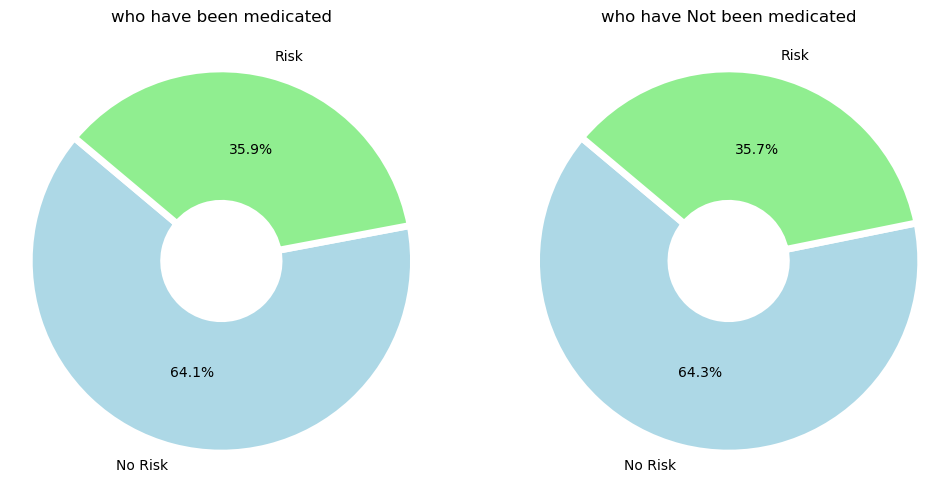

In [68]:
import matplotlib.pyplot as plt

# 약물을 투여한 환자의 심장마비 위험 퍼센트 데이터 준비
labels = risk_percentage_medicated.index
sizes = risk_percentage_medicated.values
colors = ['lightblue', 'lightgreen']

# 약물을 투여한 환자의 파이 차트
plt.figure(figsize=(12, 6))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',wedgeprops=wedgeprops, startangle=140)
plt.axis('equal') 
plt.title('who have been medicated')

# 약물을 투여하지 않은 환자의 심장마비 위험 퍼센트 데이터 준비
labels_non_medicated = risk_percentage_non_medicated.index
sizes_non_medicated = risk_percentage_non_medicated.values

# 약물을 투여하지 않은 환자의 파이 차트
plt.subplot(1, 2, 2)
plt.pie(sizes_non_medicated, labels=labels_non_medicated, colors=colors, autopct='%1.1f%%',wedgeprops=wedgeprops , startangle=140)
plt.axis('equal')
plt.title('who have Not been medicated')

plt.show()



#### 약물 투여와 심장마비 위험도 상관관계는 이 DataSets를 보고서는 명확한 판결이 어렵다.

In [69]:
# 콜레스테롤 & 심장마비 위험도 분석 
c_df = chronic_disease_risk_df.groupby('Risk')['Cholesterol'].mean().reset_index
print(c_df) # 261.97  

cn_df = chronic_disease_not_risk_df.groupby('Risk')['Cholesterol'].mean().reset_index
cn_df # 258.7 

<bound method Series.reset_index of Risk
Risk    261.970373
Name: Cholesterol, dtype: float64>


<bound method Series.reset_index of Risk
No Risk    258.708926
Name: Cholesterol, dtype: float64>

In [70]:
heart_columns_df = heart_df[['HR', 'Risk']]
risk_hr_df = heart_columns_df[heart_columns_df['Risk'] == 'Risk']
risk_hr_df['HR'].describe().T # 심장마비 위험군 환자들의 심장박동 수치

count    3139.000000
mean       74.904747
std        20.599156
min        40.000000
25%        57.000000
50%        75.000000
75%        92.000000
max       110.000000
Name: HR, dtype: float64

In [71]:
hr_df = heart_columns_df[heart_columns_df['Risk']=='No Risk']
hr_df['HR'].describe().T # 심장마비 안전한 환자들의 심장 박동 수치 

count    5624.000000
mean       75.086949
std        20.525536
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: HR, dtype: float64

#### 비만률에 따른 당뇨병 및 콜레스테롤 수치 분석

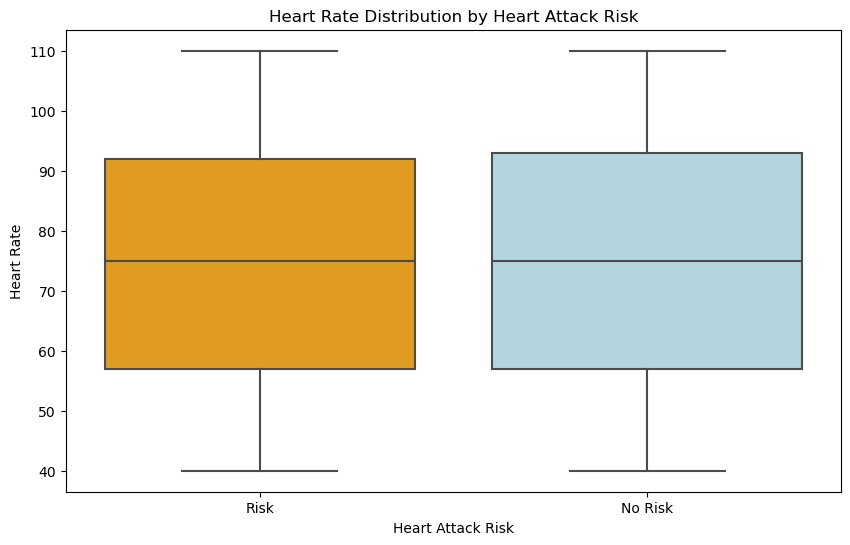

In [72]:
# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=[risk_hr_df['HR'], hr_df['HR']], palette=['orange', 'lightblue'])
plt.title('Heart Rate Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Heart Rate')
plt.xticks(ticks=[0, 1], labels=['Risk', 'No Risk'])
plt.show()


#### 심장박동수치 분석 결과 
- 심장마비 위험군 환자들과 안전한 환자들과의 심장박동 수치 차이는 크게 없는 것으로 나타났다.

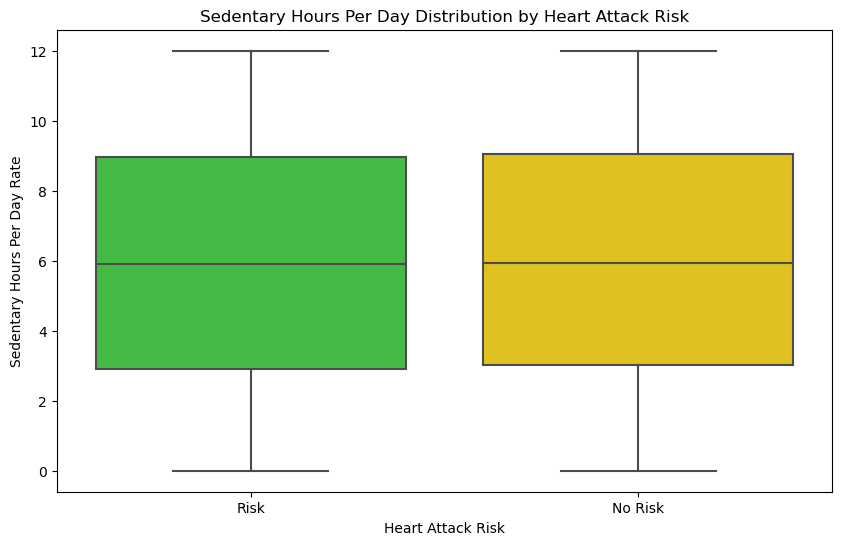

In [73]:
# 하루에 앉아있는 시간에 따른 심장마비 위험도 분석 
# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=[heart_risk_df['Sit'], heart_not_risk_df['Sit']], palette=['limegreen', 'gold'])
plt.title('Sedentary Hours Per Day Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Sedentary Hours Per Day Rate')
plt.xticks(ticks=[0, 1], labels=['Risk', 'No Risk'])
plt.show()

#### 심장박동수 , 하루에 앉아있는 시간에 따른 심장마비 발병률  분석
> 데이터 분석 결과 심장마비 위험군에 있는 환자들과 아닌 환자들은 서로 심장박동수에서 차이가 크지 않다는 점을 확인 하였다.
> 하루에 앉아있는 시간도 마찬가지로 큰 차이가 없는 것을 확인 했다.
> 
> 따라서 위 두 조건들과 심장마비 발병률과는 큰 연관성이 없다.

### 분석 보고서 
- 분석 결과 심장마비 위험군 환자와 심장마비로부터 위험하지 않은 환자들과의 차이는 당뇨병 수치와 콜레스테롤 수치와 연관이 있는 점을 확인 하였지만, 콜레스테롤 수치와 같은 경우 논문 및 인터넷 조사 결과 콜레스테롤 수치와 심혈관 질환과는 연관이 없다는 의견도 있기때문에, 콜레스테롤은 제외해도 무방하다고 판단한다.
- 더 정확한 통계분석을 위해 심장마비 발병 가능성과 관련된 데이터세트를 더 가져와서 분석하겠습니다.

### 심장마비 컬럼명 설명 2
- age = 나이
- sex (gender) = 성(1:남성, 2: 여성)별
- chest pain type (cp) = 흉통 유형 (4가지 유형)
- resting blood pressure (trestbps) = 휴식 시 혈압
- serum cholestoral in mg/dl (chol) = 혈청 콜레스테롤 (mg/dl 단위)
- fasting blood sugar > 120 mg/dl (fbs) = 공복 혈당 > 120 mg/dl
- resting electrocardiographic results (restecg) = 휴식 시 심전도 결과 (값 0,1,2)
- maximum heart rate achieved (thalach) = 최대 심박수
- exercise induced angina (exang) = 운동 유발 협심증
- oldpeak = 운동에 의해 유발된 휴식 대비 ST 하강
- the slope of the peak exercise (slope) = 운동 최대시 ST 세그먼트의 기울기
- number of major vessels (0-3) colored by flourosopy (ca) = 형광 투시법으로 색칠된 주요 혈관의 수 (0-3)
- thal: 0 = normal; 1 = fixed defect; 2 = Reversible defect
- target: 0 = 심장마비 가능성 낮음, 1 = 심장마비 가능성 높음
heart attack 

In [74]:
heart2_df = pd.read_csv('./datasets/heart.csv')
heart2_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
heart2_df.isnull().sum() # 결측치 확인

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
heart2_df.duplicated().sum()


1

In [77]:
heart2_df.drop_duplicates(inplace=True)

In [78]:
heart2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#### 협심증 종류 (Chest Pain : CP)

- 안정형 협심증 : 관상동맥이 좁아져서 심장근육에 혈액 공급이 감소되는 것이 특징 주로 안정 시 호전됨
- 불안정형 협심증 : 주로 초기 6개월에 증상이 재발하거나 심장 관련 사건이 많이 발생, 심하면 급사를 초래하므로 각별히 주의
- 이형 협심증 : 대개 늦은 밤이나 이른 아침 사이에 흉통이 
발생할 수 있고, 통증 강도가 심한 편

In [79]:
cp_df = heart2_df.groupby(['cp','target']).size().reset_index()
z_df = cp_df[cp_df['cp'] == 3]
z_df 
# 정상  > 심장마비 발생률 :39, x:104
# 안정형 협심증 > 심장마비 발생률 : 41, x : 9
# 불안정형 협심증 > 심장마비 발생률 : 68, x : 18
# 이형 협심증  > 심장마비 발생률 : 16 , x : 7

,cp,target,0
6,3,0,7
7,3,1,16


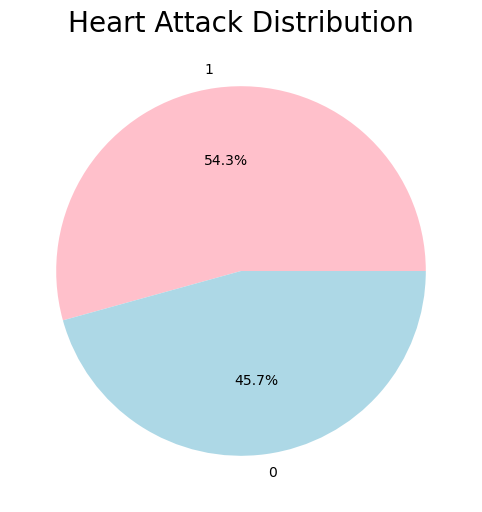

In [80]:
# 파이 차트
target_counts = heart2_df['target'].value_counts()
labels = target_counts.index
values = target_counts.values
colors = ['pink', 'lightblue']

plt.figure(figsize=(10, 6))  # 새로운 figure 생성
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Heart Attack Distribution', fontsize=20)  # 타이틀 수정
plt.show()


#### 전체 환자 중 심장마비 가능성이 높은 환자가 54.3%로 더 많다는 것을 알 수 있다.

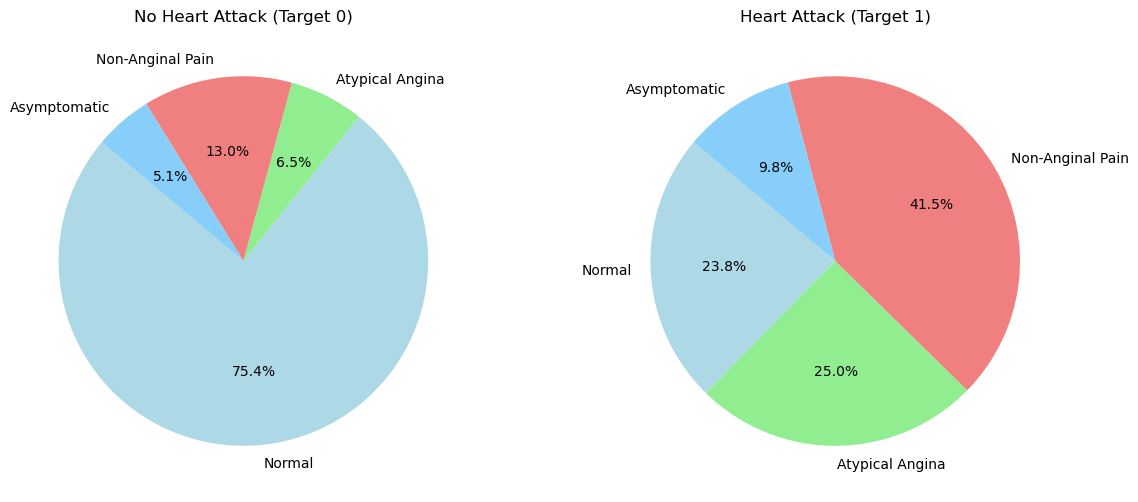

In [81]:
import matplotlib.pyplot as plt


labels = ['Normal', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
sizes_target0 = [104, 9, 18, 7]  # 심장마비 발생률 x
sizes_target1 = [39, 41, 68, 16]  # 심장마비 발생 가능성 높음 


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(sizes_target0, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
axes[0].set_title('No Heart Attack (Target 0)')


axes[1].pie(sizes_target1, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
axes[1].set_title('Heart Attack (Target 1)')

plt.show()


#### 💡가설
- 심장마비와 협심증 및 흉통은 무조건 연관성이 있을 것이다.


#### 협심증 및 흉통에 따른 심장마비 발생률 분석 
- 협심증 및 흉통 으로 인한 심장마비 발생률 같은 경우 흉통에서 41.5 %를 차지하여 가장 높은 비중을 차지 하였습니다.
- 그 다음으로 불안정형 협심증에서 25.0%로 높은 비중을 차지하였습니다.
- 흉통과 같은 경우에도 덴마크 심장마비 연구 조사에 따르면 심장마비 증상으로 흉통이 가장 비중이 높았다는 연구 결과가 있었습니다.

  

#### 💡 연구조사 이미지 - 협심증
<img src="./images/chest.png" >
<a href="https://www.chaga.or.kr/m/page.html?id=160">출처자료 : 가슴 편한 내과</a>
<div>
</div>
<h4>💡 연구조사 이미지 - 흉통</h4>
<img src="./images/data.png" >
<a href="https://health.chosun.com/site/data/html_dir/2017/12/14/2017121400213.html">출처자료 : 헬스조선</a>

In [82]:
heart2_male_df = heart2_df[heart2_df['sex'] == 1]
display(heart2_male_df)
# 남성 환자 추출 : 206명
heart2_male_df[heart2_male_df['target'] == 1]
# 심장마비 위험환자 : 92명 / 114

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


In [83]:
heart2_female_df = heart2_df[heart2_df['sex'] == 0]
display(heart2_female_df)
heart2_female_df[heart2_female_df['target'] == 1]
# 여성 환자 추출 : 96명 
# 심장 마비 위험 환자 : 72명 /24

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


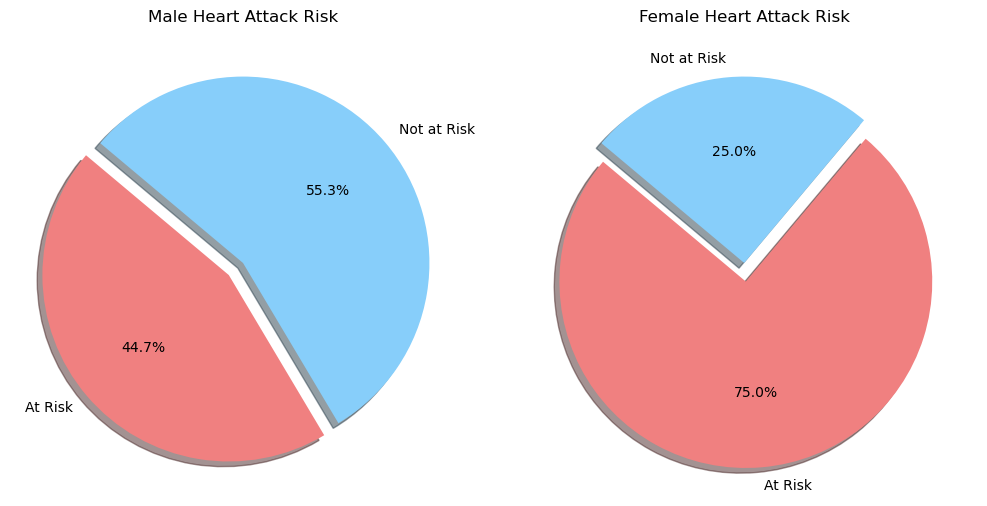

In [84]:
# 남성과 여성의 심장마비 위험 비율 데이터
labels = 'At Risk', 'Not at Risk'
male_sizes = [92, 206-92] # 114
female_sizes = [72, 96-72] # 24
# 위 sizes 들을 퍼센트로 환산한다.
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

# Subplot 설정
fig, axs = plt.subplots(1, 2)
axs[0].pie(male_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Male Heart Attack Risk')

axs[1].pie(female_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Female Heart Attack Risk')

# 도표 크기 조정
fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()


#### 성별에 따른 심장마비 발병 가능성 분석 데이터
- 남성과 여성의 심장마비 발병 가능성을 분석해본 결과 여성이 75% , 남성이 44.7%로 이 데이터세트에서는
- 여성의 심장마비 발병 가능성이 더 높다는 것을 알 수 있었습니다. 이 분석결과만으로 여성이 남성보다 심장마비 발생률이 더 높다고 측정할 수는 없지만, 인터넷 조사 결과 심장마비 사망률에 관해서는 성별간의 차이가 있었습니다. 
- 뉴스 기사 및 논문을 찾아본 결과 여성이 남성 보다 심장마비 이후 사망할 확률이 더 높다는 연구 결과가 나왔습니다.
- 이런 연구내용을 토대로 여성 같은 경우 심장 질환에 대한 각별한 주의가 필요하며 남성 같은 경우에도 경각심을 가지고
  평소에도 많은 건강관리를 해야 할 것입니다.
  

<div width='50px'>
    <img src=./images/gender.png width="800">
    
</div>

<a href="https://www.pointe.co.kr/news/articleView.html?idxno=5694#:~:text=%EA%B5%AD%EB%82%B4%20%EA%B8%89%EC%84%B1%EC%8B%AC%EC%9E%A5%EC%A0%95%EC%A7%80%20%ED%99%98%EC%9E%90,%EB%8D%94%20%EB%86%92%EB%8B%A4%EB%8A%94%20%EC%97%B0%EA%B5%AC%EA%B0%80%20%EB%82%98%EC%99%94%EB%8B%A4.">출처 : 포인트 경제 뉴스</a>

In [85]:
heart2_risk_df = heart2_df[heart2_df['target'] == 1]
heart2_risk_df # 심장마비 위험환자 추출 165명

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


In [86]:
heart2_not_risk_df = heart2_df[heart2_df['target'] == 0]
heart2_not_risk_df # 심장마비 안전 환자 추출 138명

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [87]:
heart2_risk_df['oldpeak'].mean() # 0.583030303030303
heart2_not_risk_df['oldpeak'].mean() # 1.5855072463768116

1.5855072463768116

- ST =  심전도(ECG) 상에서 QRS 복합체와 T파 사이의 구간을 말합니다. 심전도는 심장의 전기적 활동을 기록한 것으로, 심장 박동의 각 단계를 나타내는 여러 파형으로 구성됩니다.- QRS 복합체는 심실의 전기적 흥분(즉, 수축)을 나타냅니다.
- T파는 심실의 전기적 회복 또는 재분극을 나타냅니다.다- ST 분절 상승: 심근경색(심장마비)의 초기 징후일 수 있으며, 특히 특정 패턴과 함께 나타날 때 중요한 지표가 됩니다.
- ST 분절 하강: 심장의 일부 영역이 지속적으로 충분한 혈액을 받지 못하고 있음을 나타낼 수 있으며, 이는 안정형 협심증이나 불안정형 협심증의 징후일 수 있습니다.치 

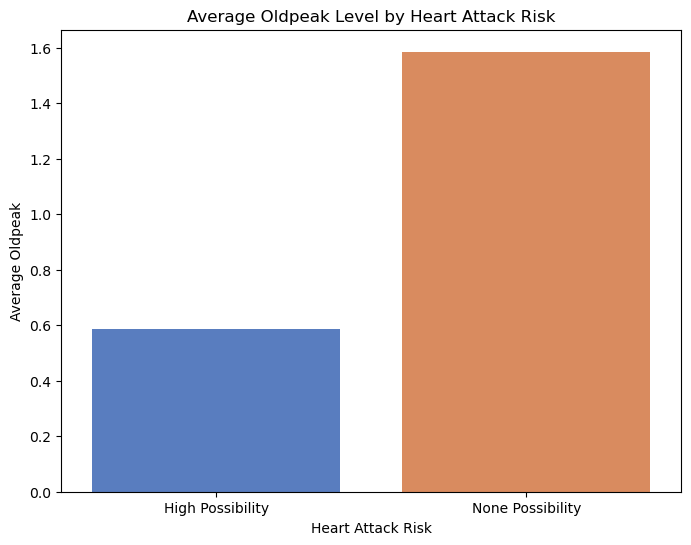

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 심장마비 위험 그룹과 위험 없는 그룹의 평균 oldpeak(운동 후 휴식간 심장박동수) 구하기
risk_mean_chol = heart2_risk_df['oldpeak'].mean()
no_risk_mean_chol = heart2_not_risk_df['oldpeak'].mean()

# 시각화를 위한 데이터프레임 생성
data = pd.DataFrame({
    'Risk': ['High Possibility', 'None Possibility'],
    'Cholesterol_mean': [risk_mean_chol, no_risk_mean_chol]
})

# 차트 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Risk', y='Cholesterol_mean', data=data, palette='muted')
plt.title('Average Oldpeak Level by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Average Oldpeak')
plt.show()


#### 휴식 대비 ST 하강과 심장마비 연관성 분석

위 시각화 차트를 통해 운동 후 휴식을 취한 후 심장박동수의 하강인 "oldpeak"이 심장마비로부터 안전한 환자들에게 더 큰 영향을 미친다는 것을 알 수 있습니다. 다시 말하면, 심장마비 위험이 낮은 환자들은 운동을 한 후 휴식을 취할 때 심장박동수가 더 많이 감소하는 경향이 있습니다.

이는 운동 후 휴식을 취할 때 심장박동수의 변화가 심장 건강에 영향을 미치며, 이 변화가 심장마비 위험을 낮추는 데 도움이 되는 중요한 지표임을 시사합니다.


In [89]:
heart2_df['thal'].value_counts()

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

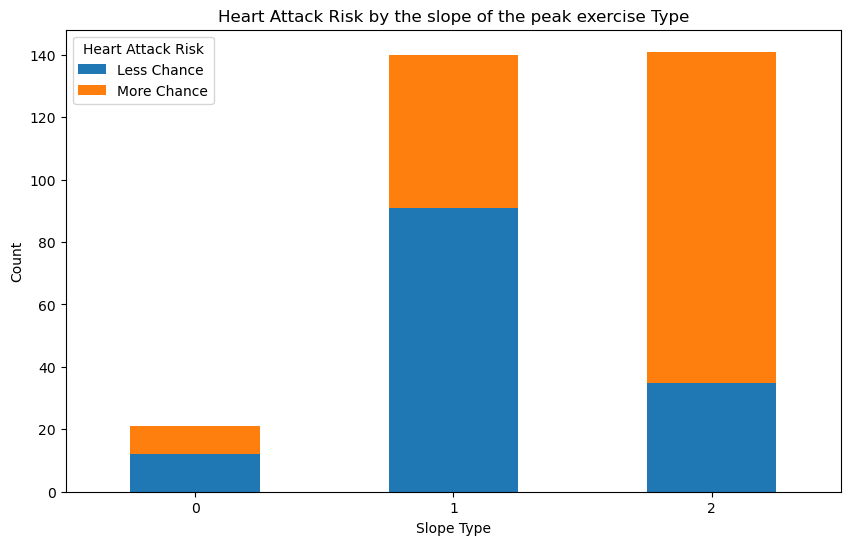

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 

# 'thal'과 'target' 컬럼으로 교차 테이블 생성
ct = pd.crosstab(heart2_df['slope'], heart2_df['target'])

# 교차 테이블을 막대 그래프로 시각화
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Attack Risk by the slope of the peak exercise Type')
plt.xlabel('Slope Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블을 수평으로 설정
plt.legend(title='Heart Attack Risk', labels=['Less Chance', 'More Chance'])
plt.show()


#### Slope(심박수 증가 기울기)에 따른 심장마비 위험도 분석
> 0 : 낮음 1: 정상 2: 높음
- 운동으로 인한 심박수 증가를 ST라고 합니다. 이 ST의 기울기를 위 데이터세트에서는 slop으로 표현하였고,
- 이 slop의 경우 위에서 설명한 oldpeak과 반대로 운동 시에 심박수 증가와 비례합니다.
- slop의 가장 높은 수치 레벨인 2단계에서 심장마비 가능성이 높은 환자들의 비율이 가장 높은 것을 볼 수 있습니다.
- 즉 심장마비 위험 환자일수록 운동 시에 심박수 증가가 일반 사람들보다 빨라진다는 것을 알 수 있으며, 따라서, 심장마비 위험 환자는 운동을 할 때 더욱 주의해야 합니다. 특히 과도한 신체 활동이나 급격한 운동은 심장에 부담을 줄 수 있으므로 적절한 운동량과 신체 활동을 유지하는 것이 중요합니다.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


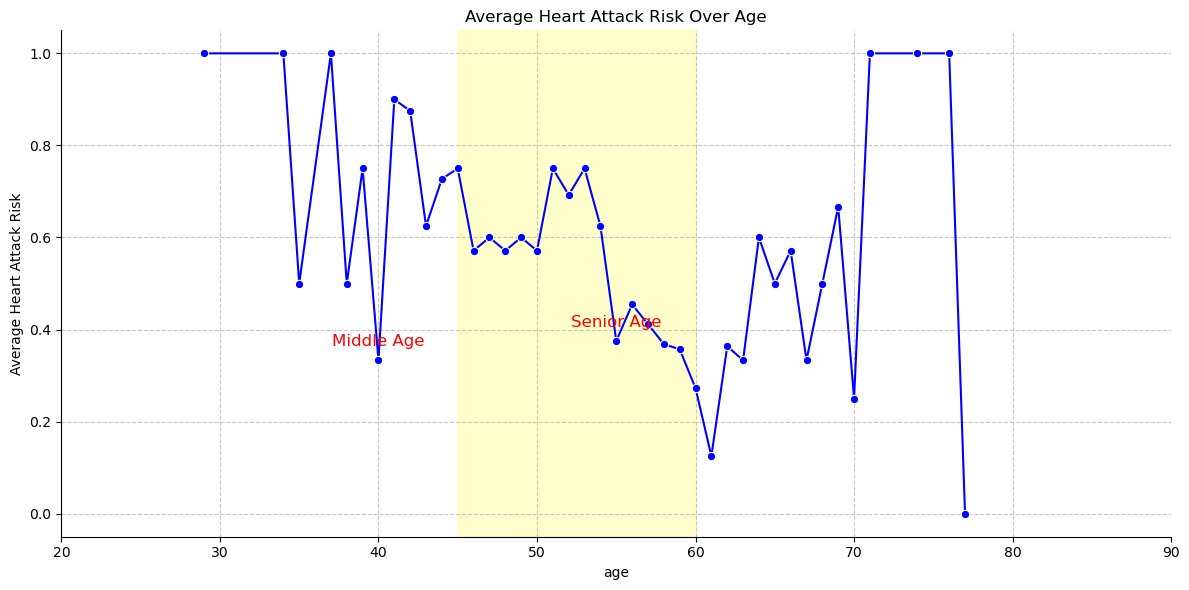

In [91]:
#  데이터를 '나이'로 그룹화하고 각 나이 그룹에 대한 평균 심장마비 발병 위험도를 계산
average_heart_attack_risk = heart2_df.groupby('age')['target'].mean()

# 그림과 축을 만듭니다
plt.figure(figsize=(12, 6))
ax = plt.gca()

# 데이터를 그립니다
sns.lineplot(x=average_heart_attack_risk.index, y=average_heart_attack_risk.values, marker='o', color='b', ax=ax)

plt.xlabel('age')
plt.ylabel('Average Heart Attack Risk')
plt.title('Average Heart Attack Risk Over Age')
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

interesting_points = [(40, "Middle Age"), (55, "Senior Age")]
for x, label in interesting_points:
    y_value = average_heart_attack_risk[x]
    ax.annotate(f'{label}', (x, y_value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='r')

highlight_age_range = (45, 60)
plt.axvspan(*highlight_age_range, alpha=0.2, color='yellow')


plt.xticks(range(20, 100, 10))


plt.tight_layout()
plt.show()

#### 위 DataSets도 마찬가지로 중장년층에서 낮은 심장마비 가능성 빈도를 보인다.
#### 그러나 30대나 70대 같은 젊은 연령대와 높은 연령대 모두 심장마비 가능성 빈도가 높은것으로 보아
#### 위 DataSets도 심장마비 발병 위험성과 나이는 크게 상관이 있어보이지 않는다.

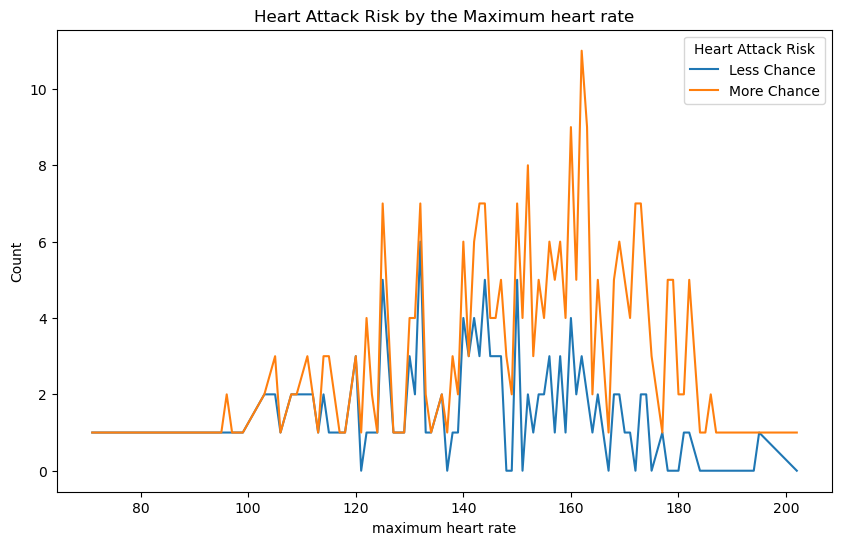

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 

# 'thal'과 'target' 컬럼으로 교차 테이블 생성
ct = pd.crosstab(heart2_df['thalach'], heart2_df['target'])

# 교차 테이블을 막대 그래프로 시각화
ct.plot(kind='line', stacked=True, figsize=(10, 6))
plt.title('Heart Attack Risk by the Maximum heart rate')
plt.xlabel('maximum heart rate')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블을 수평으로 설정
plt.legend(title='Heart Attack Risk', labels=['Less Chance', 'More Chance'])
plt.show()

#### 최대 심박수와 심장마비 발병 가능성 분석
- 위 시각화그래프를 보면 알 수 있듯이 심장마비 발병 가능성이 높은 환자들의 경우 최대 심박수가 160대에서
- 가장 높은 분포를 보였으며, 나머지 심박수에서도 마찬가지로 심장마비 가능성이 높은 환자들의 분포수가 더 많았다.
- 이러한 결과를 토대로 분석한 결과 최대 심박수가 높을 수록 심장마비 가능성과 밀접한 관계가 있다는 점을 시사한다.

### 📃 최종 분석 결과 보고서

#### 💡심장마비에 영향을 줄 수 있는 질환 3가지 
- 1. 당뇨병
  2. 협심증 (불안정형 협심증), 흉통
  3. 높은 콜레스테롤 수치
#### 💡심장마비와 밀접한 증상 & 치료
- 일반인들보다 매우 높은 심박수를 가졌다면 심장마비 발생을 의심할 수 있습니다. 만약 운동을 할때 심장이 유독 빨리 뛰거나
  운동 후에 휴식을 취해도 심장박동수가 여전히 빨리 뛴다면 과격한 운동은 피하고 충분한 휴식을 취해야 합니다. 
- 이러한 심박수 이외에도 운동을 하지 않았는데도, 숨이 찬다거나, 가슴을 짓누르는 듯한 증상이 계속 발생되면 불안정형 협심증 증상을 의심할 수 있으며, 빨리 의료 전문가의 진단을 받아야 할 필요가 있습니다.
- 당뇨병의 증상인 갈증으로 인한 다음 또는 다뇨(소변을 많이 봄), 다식(많이 먹음) 및 눈이 침침하거나 손발 저림 같은 증상을 가진 사람들의 경우 심장질환에 문제가 생길 수 있기 때문에 식사요법,운동 요법등 이러한 치료방법으로 해결하여야 합니다.
#### 💡성별에 따른 심장질환 분석 (대한민국)
 <img src='./images/gender1.png' width=600> <img src='./images/gender2.png' width=600>
- 첫번째 이미지와 두번째 이미지가 각각 성별에 따른 심장마비 발생위험분포가 각각 다른 것을 알 수 있습니다.
- 더 정확한 결과를 분석하기 위해 연구자료 및 기사를 조사한 결과 이런 내용의 기사가 나왔습니다.
  <img src='./images/gender3.png' width=900>
  <a href="https://www.pointe.co.kr/news/articleView.html?idxno=5694#:~:text=%EA%B5%AD%EB%82%B4%20%EA%B8%89%EC%84%B1%EC%8B%AC%EC%9E%A5%EC%A0%95%EC%A7%80%20%ED%99%98%EC%9E%90,%EB%8D%94%20%EB%86%92%EB%8B%A4%EB%8A%94%20%EC%97%B0%EA%B5%AC%EA%B0%80%20%EB%82%98%EC%99%94%EB%8B%A4.">출처자료 : 포인트경제</a>
- 국내의 경우 심장마비 환자 건수는 일년에 약 3만건이며, 남성의 심장마비(심정지) 발생빈도가 여성보다 2배 많지만
- 여성이 남성보다 심장 마비 후에 사망 확률이 더 높다는 연구가 나왔습니다.
- 기사 내용 내 연구원들의 주장은  여성들은 혈압, 콜레스테롤 수치 및 당뇨병을 엄격하게 관리하고 심장 재활을 의뢰 등 정기적인 모니터링이 필요하다고 말하였습니다.- 이러한 조사결과를 토대로 여성들은 심장질환에 관련해서  각별히 주의가 필요하겠습니다. 남성의 경우에도 발생빈도가 여성보다 높은 만큼 각별한 주의가 필요할 것으로 보입니다.

출처 : 포인트경제(https://www.pointe.co.kr)